## Final exercises

<strong>Overview</strong>

Part A: Explore the basic topological properties of the given protein-protein interaction network. 

Part B: From provided human PPI network identify the gene module(s) enriched with Covid-19 related genes. The genes in this module might be important for the infection (guilt-by-association) and might act as a potential drug targets.

Part C: Use network centralities to prioritize the genes in the module identified in exercise 1 to find potential drug targets for treatment of Covid-19.

Part D: Use network proximities between the potential drug targets identified in exercise 2 and the targets of known drugs to identify potential drugs for Covid-19.

<strong>Files to use:</strong>
- Network: Data/Exercise_PPI_Net.csv
- Covid-19 genes: Data/Exercise_SARS-Cov_genes.csv
- Drugs and targets : Data/Exercise_Drugs.csv

#### Part B: Identify network modules in PPI network consisting of known Covid-19 genes
- Identify modules in the provided network using Girvan-Newman method
- For each module detected check how many known known Covid-19 genes it contain

In [1]:
# Upload Python modules
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman

# Import python modules for visualizations
import matplotlib.pylab as plt

%matplotlib inline

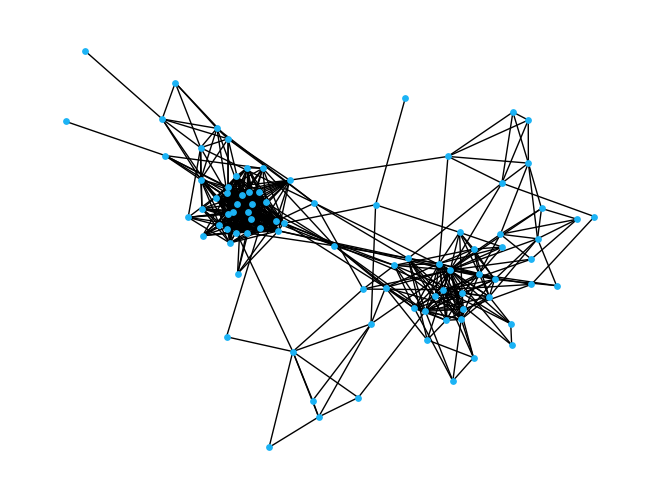

In [2]:
# Reading the PPI network
edge_list = pd.read_csv("Data/Exercise_PPI_Net.csv")

# Creating network from edge list 
ppi = nx.from_pandas_edgelist(df = edge_list,
                                source = "from", 
                                target = "to")

ppi_pos = nx.spring_layout(ppi, seed = 123)
nx.draw(ppi, with_labels = False, pos = ppi_pos, node_size = 15, node_color = "#1BB3F5")

In [3]:
# Extract the largest connected component
ppi = list(ppi.subgraph(c).copy() for c in sorted(nx.connected_components(ppi), key = len, reverse = True))[0]
print(len(ppi.nodes()), len(ppi.edges()))

88 540


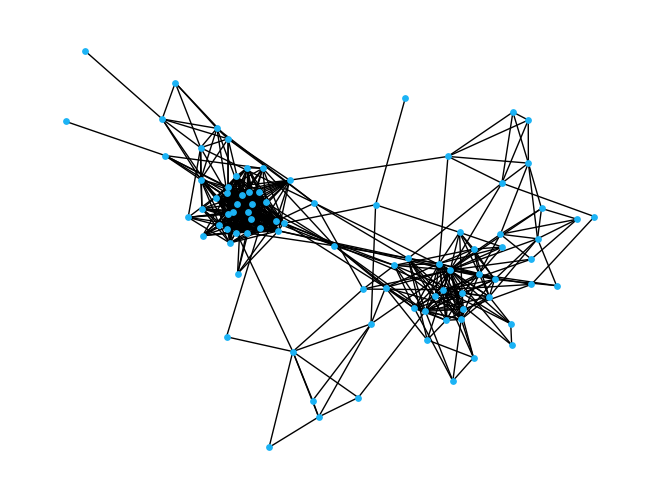

In [4]:
# Remove self-loops
ppi.remove_edges_from(nx.selfloop_edges(ppi))
nx.draw(ppi, with_labels = False, pos = ppi_pos, node_size = 15, node_color = "#1BB3F5")

In [5]:
# Use Girvan-Newman algorithm to detect communities in the network
community = girvan_newman(ppi)
community = tuple(sorted(c) for c in next(community))

# Print the number of genes in each module
for index in range(len(community)):
    print(index, len(community[index]))

0 42
1 46


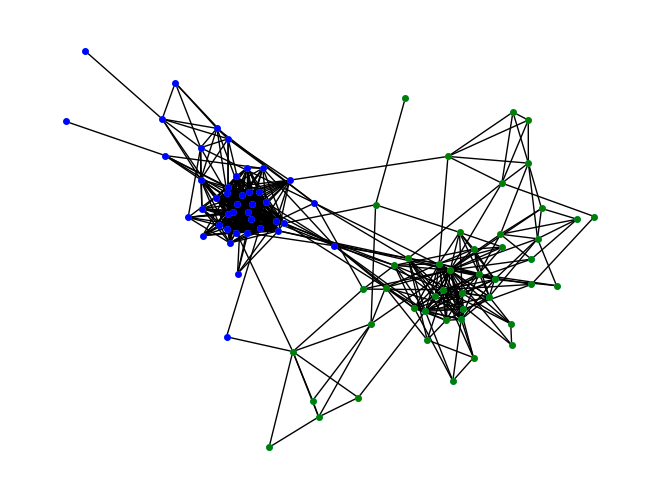

In [6]:
nx.draw(ppi, with_labels = False, pos = ppi_pos, node_size = 15, node_color = "#1BB3F5")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = community[0], node_size = 15, node_color = "blue")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = community[1], node_size = 15, node_color = "green")

In [7]:
# Read the known Covid-19 genes
covid_genes = pd.read_csv("Data/Exercise_SARS-Cov_genes.csv")
covid_genes = covid_genes.loc[:,"x"].tolist()
covid_genes


['CD9',
 'CD4',
 'BTK',
 'SARS1',
 'ATP12A',
 'ICAM1',
 'SIRT1',
 'HMOX1',
 'HIF1A',
 'PLA2G15',
 'ASAH1',
 'SARS2',
 'CD79A',
 'CEACAM5',
 'ATP4A',
 'CCL2',
 'IL2',
 'IL17A',
 'PLA2G2D',
 'SLC17A5',
 'PLAU',
 'C3',
 'RTN2',
 'ACE2',
 'GDF15',
 'ACSS2',
 'GFAP',
 'IDO1',
 'CRP',
 'IL6',
 'TLR4',
 'BCAR3',
 'DPP9',
 'REN',
 'MERTK',
 'ACE',
 'NLRP3',
 'ALB',
 'GPER1',
 'PRAP1',
 'ANPEP',
 'CXCL10',
 'PFKFB3',
 'IFNB1',
 'AQP4',
 'SELP',
 'ABO',
 'CALR',
 'MUC16',
 'SETD2',
 'TMPRSS2',
 'STING1',
 'SRL',
 'IFNA2',
 'NBR1',
 'DPP4',
 'IFNA1',
 'SREBF2',
 'MOG',
 'TNF']

In [8]:
# Check overlap of the Covid-19 genes with the gene modules
result = pd.DataFrame()
for module_number, module in enumerate(community):
    overlap = list(set(community[module_number]) & set(covid_genes))
    tmp = pd.DataFrame({"Module" : module_number,
                            "Number of module genes" : len(module),
                            "Number of overlapping SARS-CoV-2 targets" : len(overlap)}, 
                            index = [module_number])
    result = pd.concat([result, tmp])
print(result)

   Module  Number of module genes  Number of overlapping SARS-CoV-2 targets
0       0                      42                                         1
1       1                      46                                        25


Here, we see that the module 1 has the highest overlap with the known Covid-19 genes. Based on guilt-by-association, we can assume that the genes in module 1 must also be important for the disease. 

#### Part C: Prioritization of genes based on network centralities
- Extract the module from the PPI identified to be important to Covid-19 in exercise 1
- Calculate the centralities for each target
- Identify the genes that are ranked highly by the degree centrality, closeness centrality and betweenness centrality.
- Are there any genes that are common?

In [9]:
# Extract sub-network of the identified module
select_module_genes = community[1]
select_module_net = ppi.subgraph(select_module_genes)
print(len(select_module_net.nodes()), len(select_module_net.edges()))

46 178


In [10]:
# Calculate the centralities for genes 
degree_centrality = nx.degree_centrality(select_module_net)
betweenness_centrality = nx.betweenness_centrality(select_module_net)
closeness_centrality = nx.closeness_centrality(select_module_net)
centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality)})
centrality_table

,Degree centrality,Betweenness,Closeness centrality
CD4,0.422222,0.078321,0.569620
CRP,0.333333,0.016629,0.511364
GDF15,0.111111,0.000673,0.428571
RTN2,0.044444,0.000000,0.276074
SPG7,0.133333,0.053464,0.375000
LMNB1,0.088889,0.055714,0.463918
AFG3L2,0.133333,0.091550,0.420561
REN,0.266667,0.017187,0.505618
ACE,0.266667,0.011728,0.494505
ALB,0.644444,0.337466,0.692308


In [11]:
# Print top 10 genes by centrality
top_degree = list(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:10].index)
top_betweenness = list(centrality_table.sort_values(by = "Betweenness", ascending = False)[0:10].index)
top_closeness = list(centrality_table.sort_values(by = "Closeness centrality", ascending = False)[0:10].index)

print(top_degree)
print(top_betweenness)
print(top_closeness)

['ALB', 'CD4', 'HIF1A', 'TLR4', 'CRP', 'IL17A', 'DPP4', 'REN', 'ACE', 'IFNB1']
['ALB', 'AFG3L2', 'TLR4', 'CD4', 'CHAT', 'HIF1A', 'KCND3', 'ACE2', 'LMNB1', 'SPG7']
['ALB', 'CD4', 'HIF1A', 'TLR4', 'DPP4', 'CRP', 'REN', 'IL17A', 'BTK', 'ACE']


In [12]:
# Identify the genes that are common
# These genes might be more important
select_genes = list(set(top_degree) & set(top_betweenness) & set(top_closeness))
select_genes

['HIF1A', 'TLR4', 'CD4', 'ALB']

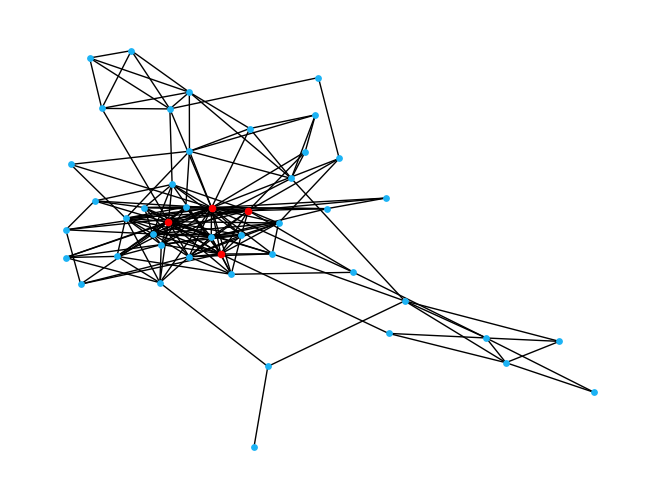

In [13]:
select_module_net_pos = nx.spring_layout(select_module_net, seed = 123)
nx.draw(select_module_net, with_labels = False, pos = select_module_net_pos, node_size = 15, node_color = "#1BB3F5")
nx.draw_networkx_nodes(select_module_net, pos = select_module_net_pos, nodelist = select_genes, node_size = 20, node_color = "red")
plt.show()

#### Part D: Drug repurposing using network based proximities
- Calculate network proximities between known drug targets and genes identified in exercise 2 as potential targets.
- Identify which drugs could be used for the treatment of Covid-19.

In [14]:
# Read the drug list and their targets
drug_targets = pd.read_csv("Data/Exercise_Drugs.csv")
drug_targets.head()

,drug_id,drug_name,drug_target,drug_target_name
0,DB00178,Ramipril,ACE,Angiotensin-converting enzyme
1,DB00184,Nicotine,CHAT,Choline O-acetyltransferase
2,DB00192,Indecainide,SCN5A,Sodium channel protein type 5 subunit alpha
3,DB00212,Remikiren,REN,Renin
4,DB00243,Ranolazine,CACNA1C,Voltage gated L-type calcium channel


In [15]:
# Since our search space is PPI, we reduce the drugs to only those that has targets in the network
drug_targets = drug_targets.loc[drug_targets["drug_target"].isin(ppi.nodes())]
print(len(drug_targets["drug_name"].unique()))

244


In [16]:
# Prepare known drug-target associations 
drug2targets = {}
for drug in drug_targets["drug_name"].unique(): 
    drug2targets[drug] = [e for e in drug_targets.loc[drug_targets["drug_name"] == drug, "drug_target"]]

In [17]:
len(drug2targets)

244

In [18]:
# Remove drugs with one known targets
drug2targets = {key: value for key, value in drug2targets.items() if len(value) > 1}
len(drug2targets)

9

Here, we can see that the number of drugs significantly decreases as most drugs have just one known target.

In [19]:
# Calculate network separation between the targets of known drugs and selected genes in exercise 2 
import separation # from Barabasi-lab
result = pd.DataFrame()
for drug in drug2targets.keys():

    genes_A = set(select_genes) & set(ppi.nodes())
    genes_B = set(drug2targets[drug]) & set(ppi.nodes())

    d_A = separation.calc_single_set_distance(ppi,genes_A)
    d_B = separation.calc_single_set_distance(ppi,genes_B)

    # distances BETWEEN the two gene sets:
    d_AB = separation.calc_set_pair_distances(ppi,genes_A,genes_B)

    # calculate separation
    s_AB = d_AB - (d_A + d_B)/2

    tmp = pd.DataFrame({"Drug" : drug,
                            "Number of targets" : len(genes_B),
                            "Separation" : s_AB},
                            index = [0])

    result = pd.concat([result, tmp])
result = result.sort_values(by = "Separation", ascending = True)
result = result.reset_index(drop = True)
result

,Drug,Number of targets,Separation
0,Fostamatinib,3,-0.023810
1,Lisinopril,2,0.000000
2,SPP1148,2,0.000000
3,Dronedarone,2,0.500000
4,Isavuconazole,2,0.500000
5,Phenytoin,2,0.500000
6,Zonisamide,2,0.666667
7,Lidocaine,2,0.666667
8,Flecainide,2,0.666667


The separation  score indicates the proximity between the targets of the drug and the potential drug targets identified in exercise 2. Lower separation score indicate higher proximity. Here, we can see that Fostamatinib had the lowest separation score, i.e., the targetts of Fostamatinib were closer to the identified potential targets with respect to the other drugs. This can be seen the plot below where the potential targets and the targets of three drugs are shown.

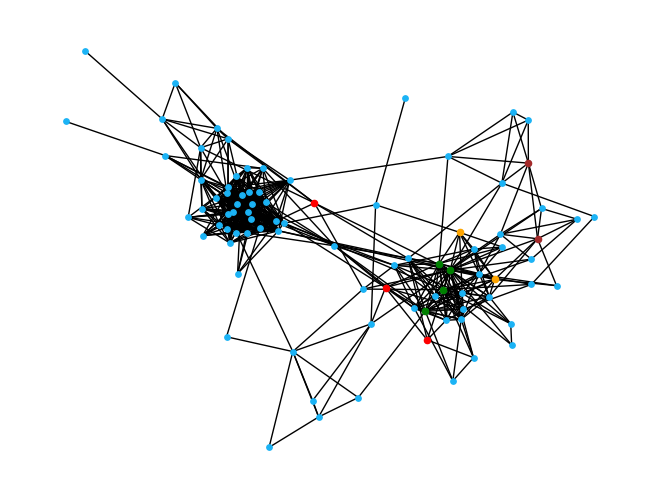

In [20]:
# Show the plot of the drug targets for the selected drug and the identified potential targets

select_targets_1 = drug2targets["Fostamatinib"]
select_targets_2 = drug2targets["SPP1148"]
select_targets_3 = drug2targets["Flecainide"]

nx.draw(ppi, with_labels = False, pos = ppi_pos, node_size = 15, node_color = "#1BB3F5")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = select_genes, node_size = 20, node_color = "green")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = select_targets_1, node_size = 20, node_color = "red")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = select_targets_2, node_size = 20, node_color = "orange")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = select_targets_3, node_size = 20, node_color = "brown")

plt.show()